# 📊 S&P 500 Companies: Financial Performance Analysis

### **Project Title:**  
**Exploring Sector-Level Financial Trends in the S&P 500 using Bootstrapping & Statistical Inference**

**Dataset Source:**  [Kaggle – S&P 500 Companies with Financial Information](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information/data)

**Author:**  Kavya Khanna

**Course:**  SEIS 631 – Data Preparation & Analysis (Fall 2025)

**Goal:**  Use real-world financial data to assess and compare key sector metrics, with uncertainty estimation using bootstrapping.

**Background:** S&P 500 stands for the Standard & Poor’s 500 Index.
It is a stock market index that tracks the performance of 500 large, publicly traded companies listed on U.S. stock exchanges.
These companies span 11 sectors, including technology, healthcare, energy, financials, etc.
It is one of the most widely used benchmarks for the overall performance of the U.S. stock market and economy.
**Key Financial Metrics Explained:**
EBITDA → profitability

Earnings/Share → per-share profit

Price/Earnings → valuation

Dividend Yield → investor return

Market Cap → company size

In [7]:
#Import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df=pd.read_csv('C:\\Users\\Kavya\\OneDrive - University of St. Thomas\\Desktop\\SEISS-631-02\\assignment-clt-kavyakhanna-1\\financials.csv')
pd.options.display.float_format = '{:,.2f}'.format
df.drop(columns=['Price/Book'], inplace=True)
df['Price/Earnings'].fillna(df['Price/Earnings'].median())
df.duplicated().sum() #no duplicates 
df.select_dtypes(include='object').columns #check all object data type columns


Index(['Symbol', 'Name', 'Sector', 'SEC Filings'], dtype='object')

In [10]:
df.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,"138,721,055,226.00","9,048,000,000.00",4.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.92,"10,783,419,933.00","601,000,000.00",3.58,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,"102,121,042,306.00","5,744,000,000.00",3.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,"181,386,347,059.00","10,310,000,000.00",6.29,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,"98,765,855,553.00","5,643,228,000.00",2.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.43,1.28,74.94,38.93,"52,518,668,144.00","2,704,000,000.00",10.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.35,7.43,225.36,142.00,"6,242,377,704.00","587,800,000.00",1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.00,3.39,204.45,114.45,"94,550,214,268.00","2,538,040,000.00",13.09,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.22,6.19,169.55,78.81,"8,123,611,867.00","853,941,000.00",1.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.00,0.03,15.65,9.70,"11,191,663,795.00","339,000,000.00",2.11,http://www.sec.gov/cgi-bin/browse-edgar?action...


**Sector wise profit analysis (using EBITDA)**

In [21]:
#sector wise profit using median 
sector_profit = df.groupby('Sector')['EBITDA'].agg(['median']).round(2)
sector_profit = sector_profit.sort_values(by='median', ascending=False)
sector_profit


,median
Sector,
Telecommunication Services,"45,745,000,000.00"
Consumer Staples,"3,011,012,500.00"
Utilities,"2,895,500,000.00"
Energy,"2,407,000,000.00"
Materials,"2,152,000,000.00"
Consumer Discretionary,"1,962,093,500.00"
Health Care,"1,676,204,000.00"
Information Technology,"1,667,542,000.00"
Industrials,"1,635,916,000.00"


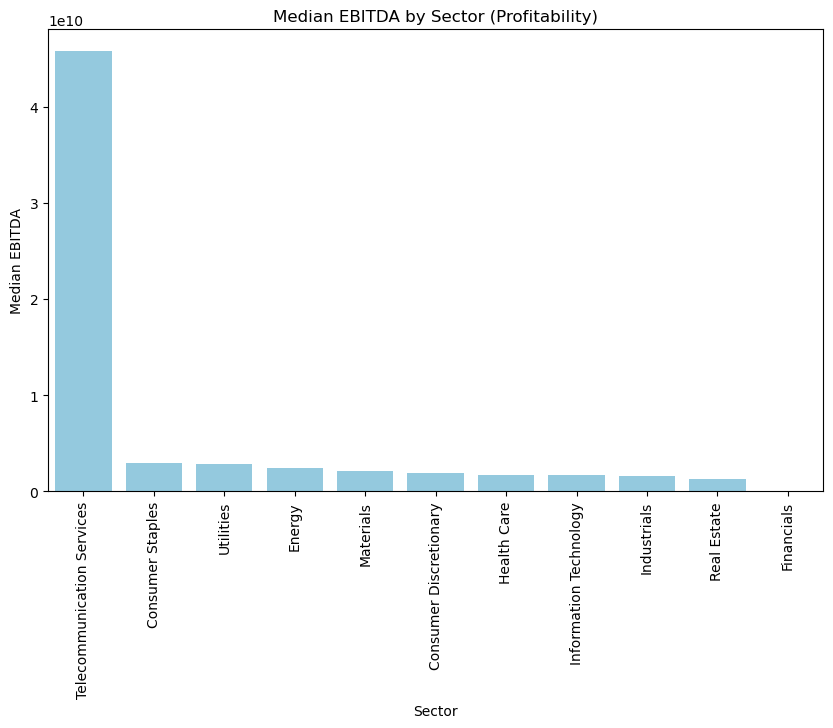

In [22]:

plt.figure(figsize=(10,6))
sns.barplot(x=sector_profit.index, y=sector_profit['median'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Median EBITDA by Sector (Profitability)')
plt.ylabel('Median EBITDA')
plt.show()

The bar chart illustrates the median EBITDA across various sectors in S&P 500 Companies. The technology sector shows the highest profit as compared to the other sectors. However, Financial is the only sector with no profitability indicating loss in that sector. 

In [ ]:
#Implement bootstraping here 